<a href="https://colab.research.google.com/github/JNSDKV/BANK-MARKETING-EFFECTIVENESS-PREDICTION/blob/main/_Bank_Marketing_Effectiveness_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bank Marketing Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Contributor -** PERWEZ ALAM


# **Project Summary -**

The Bank Marketing Effectiveness Capstone Project of Data Science is a project focused on using data science techniques to analyze and optimize a bank's marketing strategy. The project involves working with a dataset that contains information on bank customers and their response to marketing campaigns.

The goal of the project is to develop a predictive model that can identify customers who are most likely to respond positively to marketing campaigns. This will help the bank to target its marketing efforts more effectively and achieve higher conversion rates.

The project begins with data exploration and cleaning. The dataset contains a large number of variables, including demographic information, account details, and historical transaction data. The data is cleaned and prepared for analysis, which involves handling missing values, transforming variables, and encoding categorical variables.

The next step is exploratory data analysis, which involves visualizing and summarizing the data to gain insights into the relationship between variables and the response variable. This step helps to identify important variables that are likely to be good predictors of customer response.

The next stage of the project is feature engineering, which involves creating new variables that are likely to be predictive of customer response. This may involve combining existing variables or creating new variables based on domain knowledge.

The next step is model selection, which involves selecting the appropriate model to predict customer response. Several models are tested and evaluated based on their performance on a validation set. The best-performing model is then selected for deployment.

The final step is model deployment, which involves integrating the predictive model into the bank's marketing strategy. The model is used to identify customers who are most likely to respond positively to marketing campaigns, and these customers are targeted with personalized marketing messages.

The success of the project is measured based on the improvement in conversion rates achieved by the bank's marketing strategy. The project provides valuable insights into the effectiveness of the bank's marketing strategy and helps to optimize the bank's marketing efforts to achieve higher conversion rates.

In summary, the Bank Marketing Effectiveness Capstone Project of Data Science is a data science project focused on using predictive modeling to optimize a bank's marketing strategy. The project involves data exploration and cleaning, exploratory data analysis, feature engineering, model selection, and model deployment. The project provides valuable insights into the effectiveness of the bank's marketing strategy and helps to optimize the bank's marketing efforts to achieve higher conversion rates.



# **GitHub Link -**

https://github.com/JNSDKV/BANK-MARKETING-EFFECTIVENESS-PREDICTION

# **Problem Statement**


The project Iam  working on involves analyzing data from a Portuguese bank's phone-based marketing campaign to determine if clients are likely to subscribe to a term deposit. The bank made multiple phone calls to clients to see if they were interested in the term deposit, and my task is to predict whether or not a client will subscribe based on the data you have. I will use classification techniques to make this prediction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math
from scipy.stats import *


# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/ALMA BETTER/bank-full.csv',sep=';')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape


(45211, 17)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There is no duplicate values in our dataset.

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It seems that there is no missing values in any of the variable of the dataset . But as values which were not known has been replaced by "unknown" and which will be considered as one value in itself. So, need to work on it to resolve the issue.

In [9]:
# Replacing Unknown entry in the dataset across the columns with np.nan
df = df.replace('unknown', np.nan)

In [10]:
#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
poutcome,45211,36959,81.75
contact,45211,13020,28.80
education,45211,1857,4.11
job,45211,288,0.64
month,45211,0,0.00
previous,45211,0,0.00
pdays,45211,0,0.00
campaign,45211,0,0.00
duration,45211,0,0.00
age,45211,0,0.00


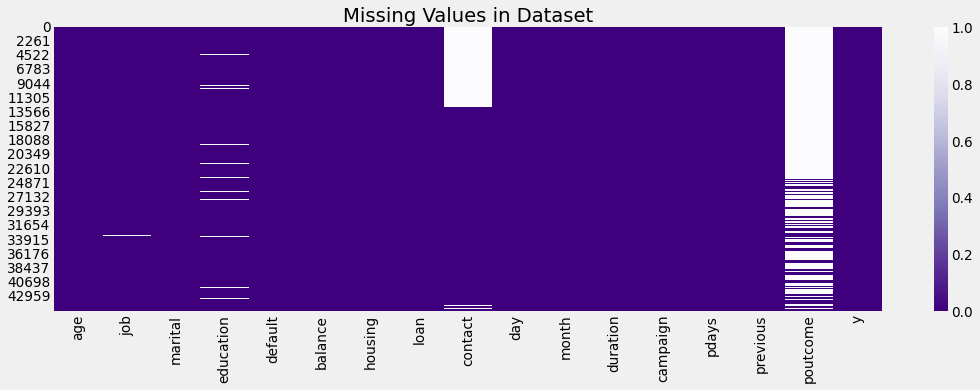

In [11]:
# Visualizing the missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True,cmap="Purples_r")
plt.xticks()
plt.title('Missing Values in Dataset')
plt.show()

### What did you know about your dataset?

Based on the initial overview of the dataset, here are the observations:

*  The dataset contains 45,211 records and 17 columns.
*  There are 10 categorical features with object data type and 7 continuous features with either integer or float data types.
*  There is no duplicate values in the dataset.
*  We noticed that some columns have unknown values, which were replaced with np.nan and then counted.
*  Specifically, the Education, Contact, and poutcome columns have missing values.
*  To handle these missing values, further data exploration and cleaning may be necessary. Depending on the amount and nature of the missing values, one possible approach could be to impute the missing values with mean, median or mode values for the respective columns. Alternatively, we may consider dropping the rows or columns with missing values if they are not critical for our analysis.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Variables Description 

**______ job _______**
*   This feature represents the type of job of the potential customers, with 12 unique categories including management, technician, entrepreneur, blue-collar, unknown, retired, admin, services, self-employed, unemployed, housemaid, and student. There are 0.64% unknown values in this column.

**_______ martial _______**
*   This column represents the marital status of the potential customers, with three unique categories including married, single, and divorced. Majority of the customers (60%) are married.

**_______ education _______** 
*  This column represents the educational qualification of the potential customers, with three unique categories including tertiary, secondary, and primary. There are 4.11% unknown values in this column, and the majority of customers (61%) have a secondary education.

**_______ default _______**
*   This column represents whether the customer has credit in default or not, with two unique categories including yes or no. We observed that 98% of the population does not have credit in default.

**_______ housing _______**
*   This column represents whether the customer has a housing loan or not, with two unique categories including yes or no. The data is evenly distributed in this column.

**_______ loan _______**
*   This column represents whether the customer has opted for any kind of loan or not, with two unique categories including yes or no. Majority of customers fall in the 'no' category.

**_______ contact _______** 
*   This column represents the mode of establishment of communication between customers and the bank, with two unique values including cellular and telephone. We observed 28.80% unknown values in this column. Most of the customers have been contacted on a cell phone.

**_______ month _______**
*   This column represents the month in which the customers were last contacted, with most customers contacted in the month of May, followed by July and August.

**_______ poutcome _______**
*   This column suggests the outcome of the last campaign, with four categories including failure, others, and success. 81% of the data were found to be unknown.

**_______ y (term_deposit) _______**
*   This is the target variable which represents whether the customer went for a term deposit or not, with two fields including yes or no. We observed a class imbalance in the target variable, which needs to be treated before putting it into the model.

**_______ age _______**
*   This feature represents the age of the potential customers, with a mean around 40 and median close to the mean.
balance: This feature depicts the account balance, with a huge gap between the mean and median.

**_______ day _______**
*   This feature represents the day of the month (1 to 31) on which the customer was last contacted.

**_______ duration _______**
*   This feature depicts the time duration for which the customer was last contacted. Note that it should be only included for benchmark purposes and ignored if the objective is a realistic predictive model.

**_______ campaign _______**
*   This feature represents how many times each prospective consumer was contacted as part of the current campaign.

**_______ pdays _______**
*   This feature represents the number of days passed by after the client was contacted from a previous campaign, with most clients not being contacted at all, which is represented by -1 in the dataset.

**_______ previous _______**  
*  This feature represents the number of contacts performed before this campaign.






### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

age          [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...
job          [management, technician, entrepreneur, blue-co...
marital                            [married, single, divorced]
education                  [tertiary, secondary, nan, primary]
default                                              [no, yes]
balance      [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...
housing                                              [yes, no]
loan                                                 [no, yes]
contact                             [nan, cellular, telephone]
day          [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...
month        [may, jun, jul, aug, oct, nov, dec, jan, feb, ...
duration     [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
campaign     [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays        [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...
previous     [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...
poutcome                        [nan, failure, other, s

In [15]:
# creating a list of categorical and continuous features
categorical_list = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

continuous_list = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']

In [16]:
df[continuous_list]

,age,balance,day,duration,campaign,previous
0,58,2143,5,261,1,0
1,44,29,5,151,1,0
2,33,2,5,76,1,0
3,47,1506,5,92,1,0
4,33,1,5,198,1,0
...,...,...,...,...,...,...
45206,51,825,17,977,3,0
45207,71,1729,17,456,2,0
45208,72,5715,17,1127,5,3
45209,57,668,17,508,4,0


In [17]:
print("Unique values in these categorical features: \n")
for i in categorical_list:
  print(f'Unique values in {i}---------->>  {df[i].unique()}')

Unique values in these categorical features: 

Unique values in job---------->>  ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in marital---------->>  ['married' 'single' 'divorced']
Unique values in education---------->>  ['tertiary' 'secondary' nan 'primary']
Unique values in default---------->>  ['no' 'yes']
Unique values in housing---------->>  ['yes' 'no']
Unique values in loan---------->>  ['no' 'yes']
Unique values in contact---------->>  [nan 'cellular' 'telephone']
Unique values in month---------->>  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome---------->>  [nan 'failure' 'other' 'success']
Unique values in y---------->>  ['no' 'yes']


## 3. ***Data Wrangling***

### Data Wrangling Code

## **Handling missing values.**

In [18]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [19]:
# replacing null values in job , education , contact with mode in respective columns
null_list = ['job','education','contact']
for i in null_list:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [20]:
# replacing null or unknown values with the category 'other' 
df['poutcome'].fillna('other',inplace=True)

In [21]:
df['p_contacted'] = [0 if x == -1 else 1 for x in df.pdays]
df.drop(columns=['pdays'], inplace=True)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,p_contacted
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,other,no,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,other,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,other,no,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,other,no,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,other,no,0


In [22]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
previous       0
poutcome       0
y              0
p_contacted    0
dtype: int64

[**  Finally we dont have any null values in the dataset*]







### What all manipulations have you done and insights you found?

1. **Job**: There were 288 nan values in this column. So we substituted the same with the mode of the column i.e. "Blue Collar jobs" as it was a categorical variable.
2. **Education**: There were 1857 nan values in this column, we substituted it  with the mode i.e. "Secondary Education".
3. **Contact**: Since there are 13,020 nan values in this column and we are aware that cellular communication is currently the most preferred one, we made the assumption that the nan values might be replaced with cellular type values. And also the mode of the column is 'Cellular'.
4. **poutcome**: It contained 3 fields that is 'success', 'failure' and 'others'. Here we assumed that the unknown data points will fall under 'other' category, thus were filled with 'other'.
5. **pday**: We have mapped the non contacted values i.e -1 as 0 and all the other values as 1, where 1 represents that the client was contacted.Then we renamed the column to **p_contacted**.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [23]:
# Plotting distribution plot for various continuous variables
def plot_cont(x):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(x.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(x.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= x[t],   
                     ax=ax)
        plt.title(t + '_distribution')

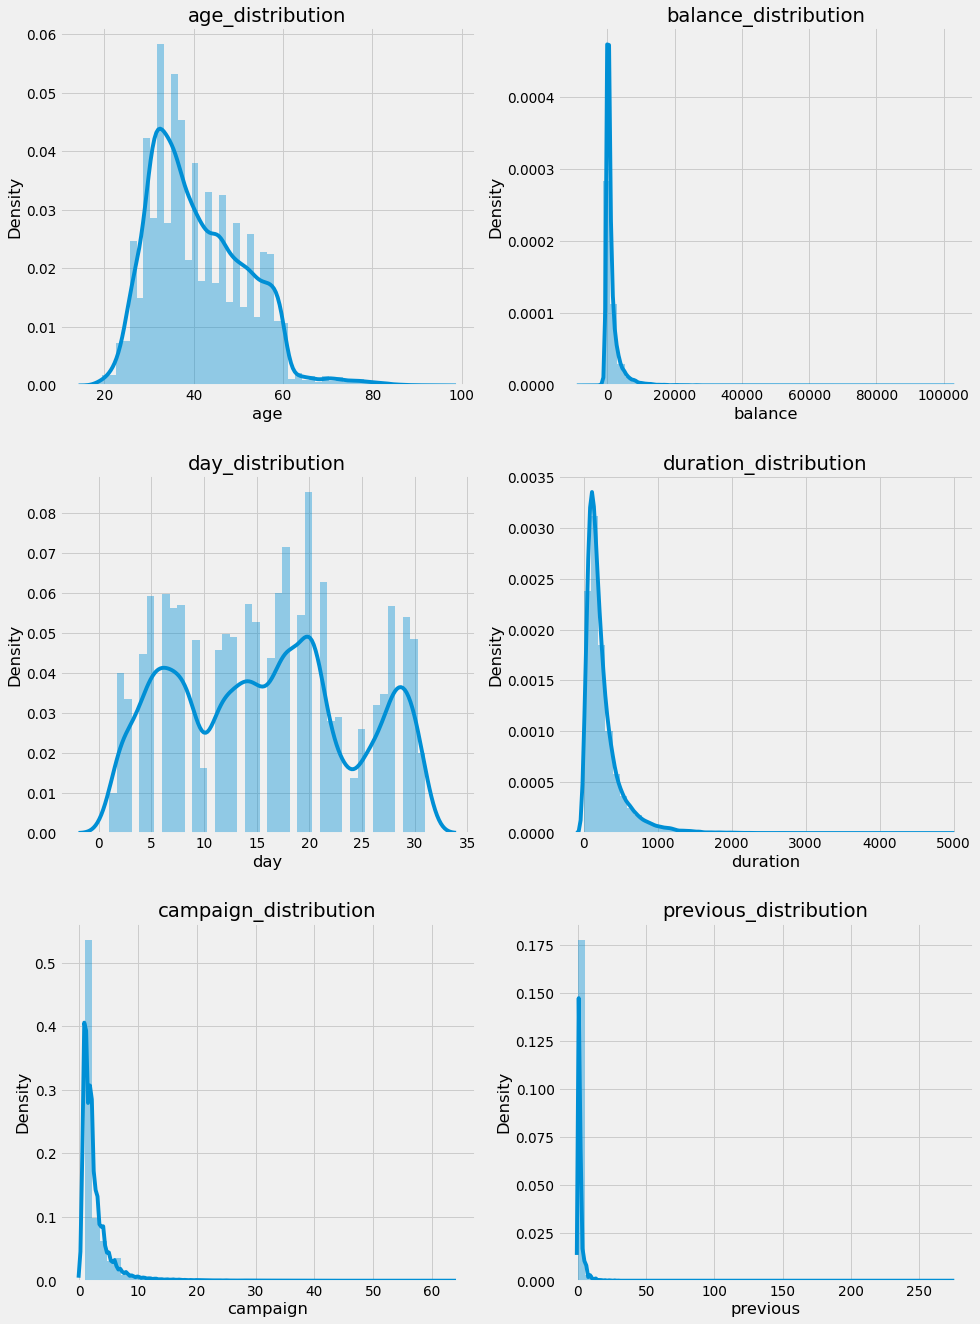

In [24]:
plot_cont(df[continuous_list])

In [25]:
(df[continuous_list]).skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
previous    41.846454
dtype: float64

##### 1. Why did you pick the specific chart?

**We are plotting the probability density function for the different continuous variables to check the spread of data.It provides the details of where the centeral tendencies lie and what is the variance of particular feature.**

##### 2. What is/are the insight(s) found from the chart?

These are the insights found from diffrent variables:

* The population belongs to the age group below 60 that is working population is our target customers.

* Majority of people earns less than $5000.

* There is a huge bump at zero in both previous and campaign columns that means most of the customers were not contacted at all.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The above insigts can be helpful in targeting our customers as per their age and salary . They may be a potential customer who may do term deposit in near future. Since we saw that most of the customers were not contacted it means we are losing out on these potential customers because we are leaving them unattended.**

#### Chart - 2

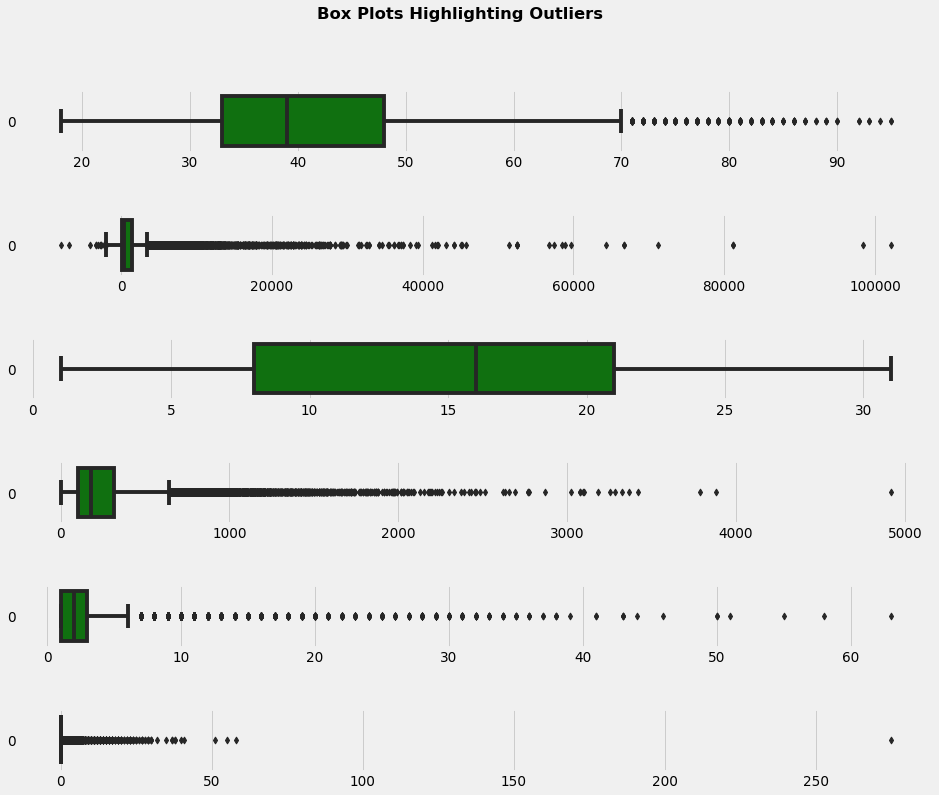

In [26]:
# Chart - 2 visualization code
# plotting box plot for each continuous variable.
nrows = len(continuous_list)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(continuous_list):
    sns.boxplot(df[var], orient='h', ax=axes[i],color= 'g')

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

**We picked box plot to check for outliers in each continuous variable features**.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we came up with the following insights:

* **We can observe that there are a bunch of customers who were contacted more than 20 times on the other hand bulk of clints who were not contacted at all**.
* **Same is the case with duration of the call in the last contact where some customers were given ample amout of time while majority calls were of the shorter duration**.
* **The median clint age is close to 40 and there are not many clints who were more than 60**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes above insights can be helpful in identifying where the company is going wrong in terms of engaging with the customers. If right customers will be targeted with proper strategy it may proved to be in the favour of the comapany**.

#### Chart - 3

In [27]:
# Chart - 3 visualizatio.
cat_list1 = ["y","default","housing","loan"]

In [28]:
def plot_cont(x):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(x.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(x.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        plt.pie(x[t].value_counts(), labels = ['Yes','No'], autopct='%1.0f%%', colors=['blue', 'orange'],startangle=45, shadow = True)
        plt.title(t + '_count')


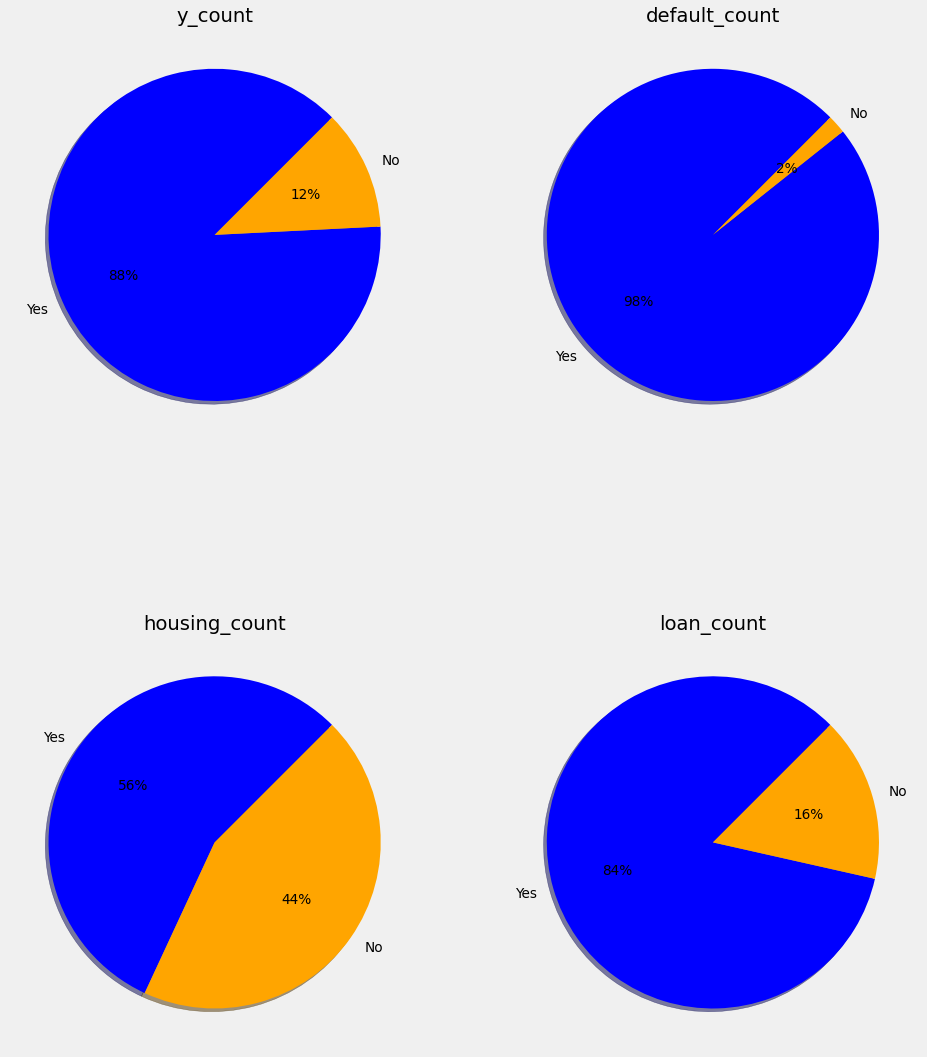

In [29]:
plot_cont(df[cat_list1])

##### 1. Why did you pick the specific chart?

**Since all the above featurs are of binary categories i.e it has two fields either yes or no we can know the percentage of occurance of these which may tell us some story.**

##### 2. What is/are the insight(s) found from the chart?

* **Our target variable i.e y has majority of yes, this the clear of class imbalance.**
* **98% of the population has credit in default.**
* **56% has already opted for housing loan.**
* **84% has opted for some kind of loan.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes Class imbalance can have ill impact on the accuracy of the classification model So it will be necessory for us to treat this problem before putting the data in training. Other imformation which are available to us through the pie chart can be helpful in categorizing the customers into groups and then make plans accordingly.**

#### Chart - 4

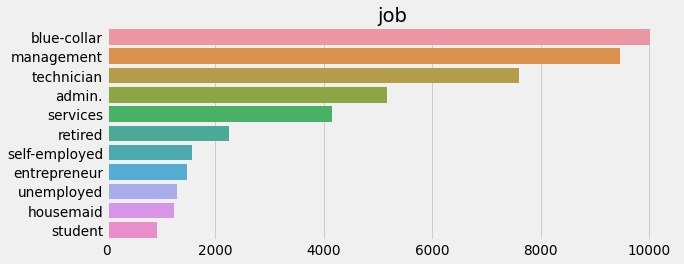

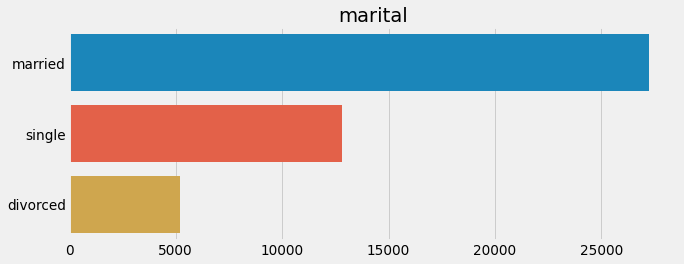

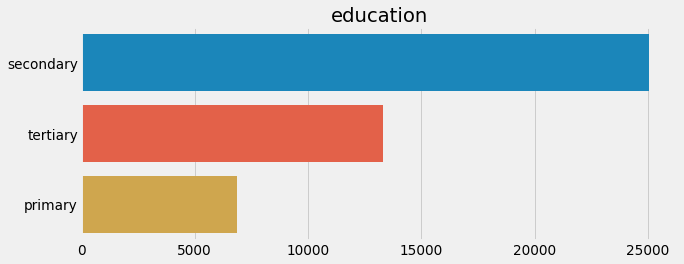

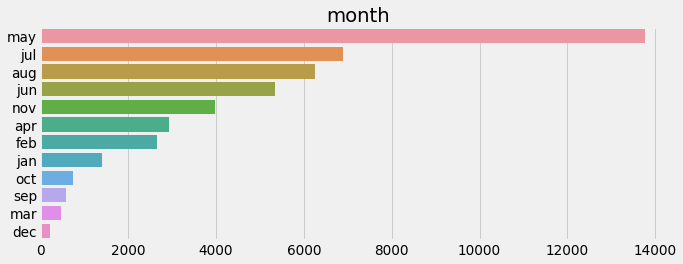

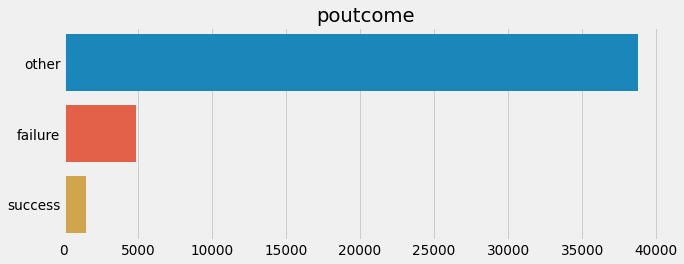

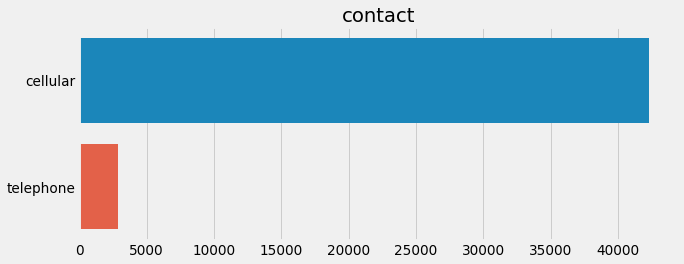

In [30]:
# Chart - 4 visualization code
relevent_list1 = ['job', 'marital', 'education', 'month', 'poutcome', 'contact']
for col in relevent_list1:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

**All the features that we have taken in the above plots have more than two categories . So we chose column charts to know the number of outcomes in each categories**

##### 2. What is/are the insight(s) found from the chart?

We can see that:

* **The majority of targeted clients are employed in Blue Collar jobs followed by management and technician.**
* **The majority of targeted clients have only completed secondary education.**
* **Most of the potential clients are married.**
* **poutcome shows that 90% of the data belong to the category where the outcome of the last campaign is unkown.**
* **Most of the contacts were made with the cell phone**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Above plots can be useful in categorzing the clints in terms their employment , education and marital status , which can be useful in making effective strategies to woo different groups.**

#### Chart - 5

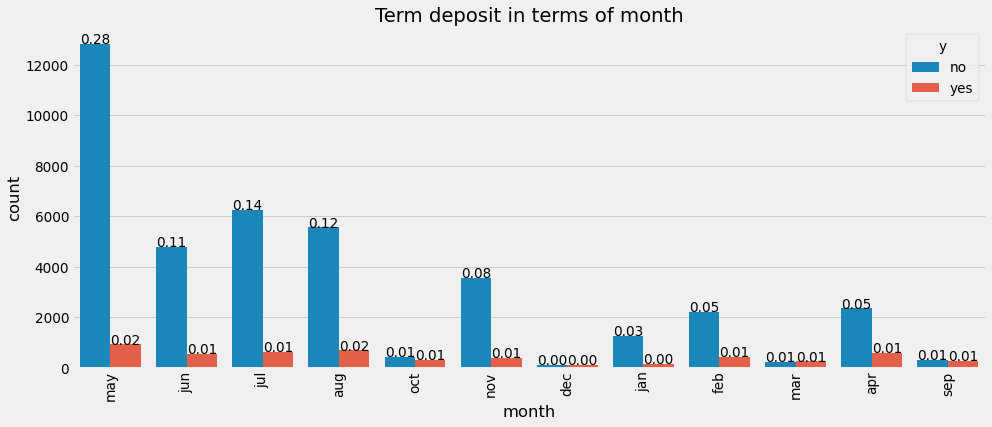

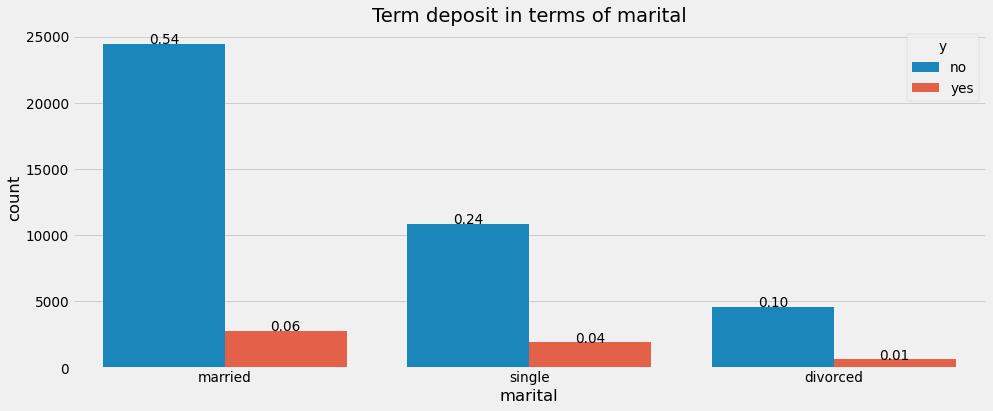

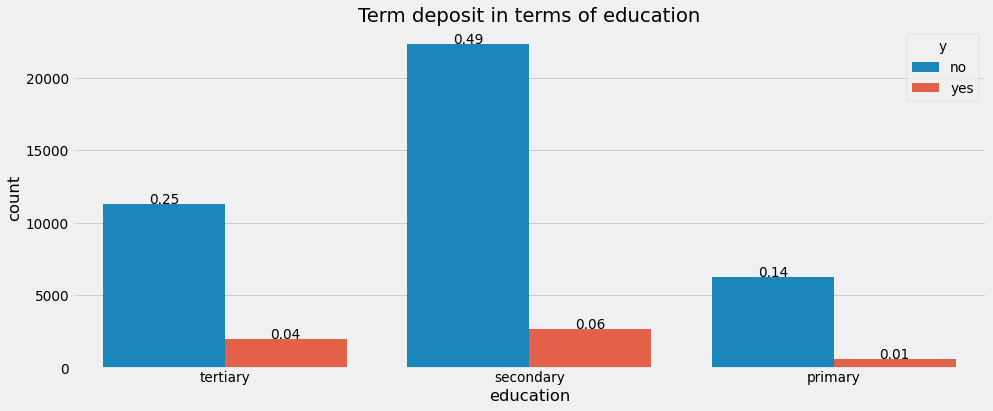

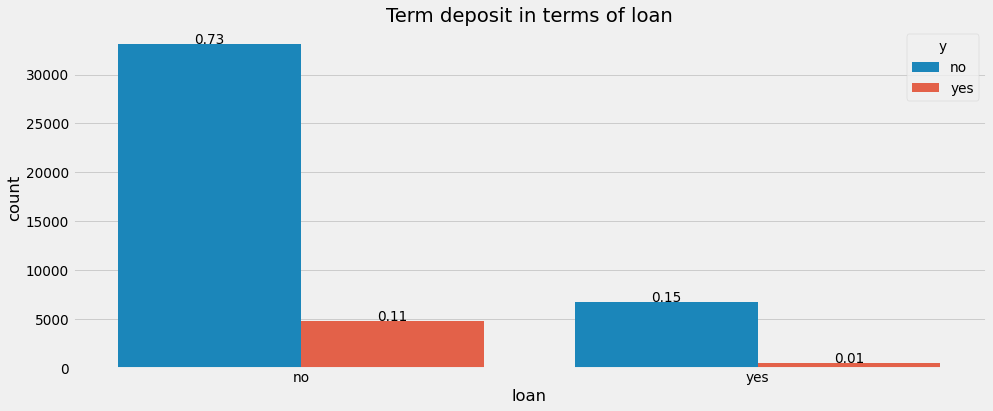

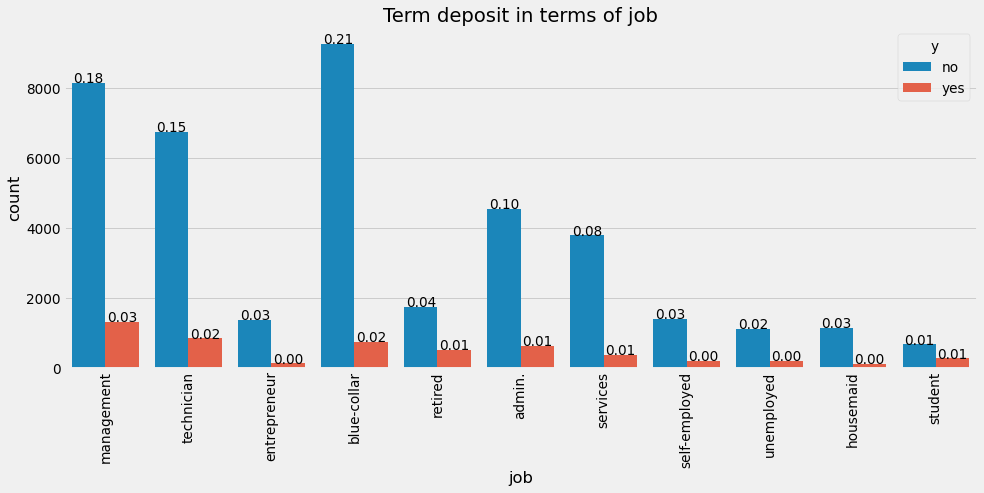

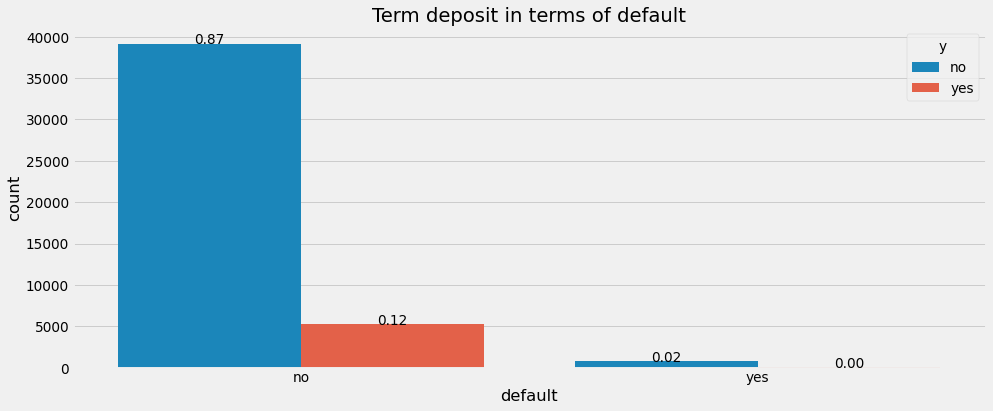

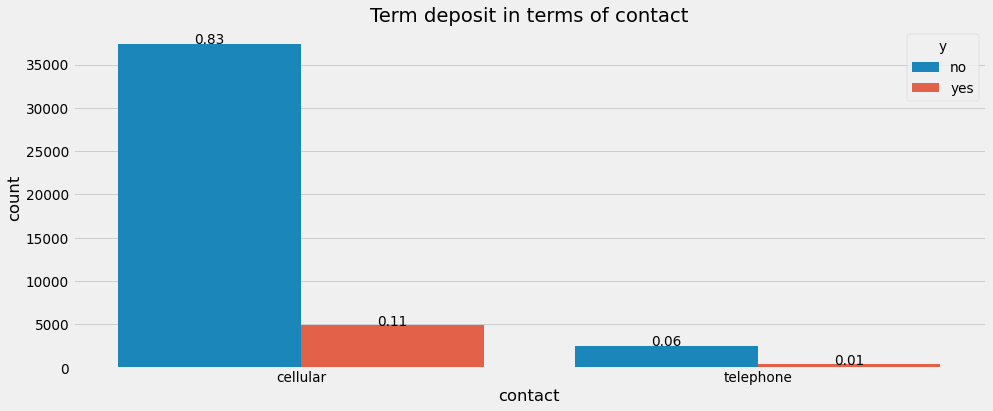

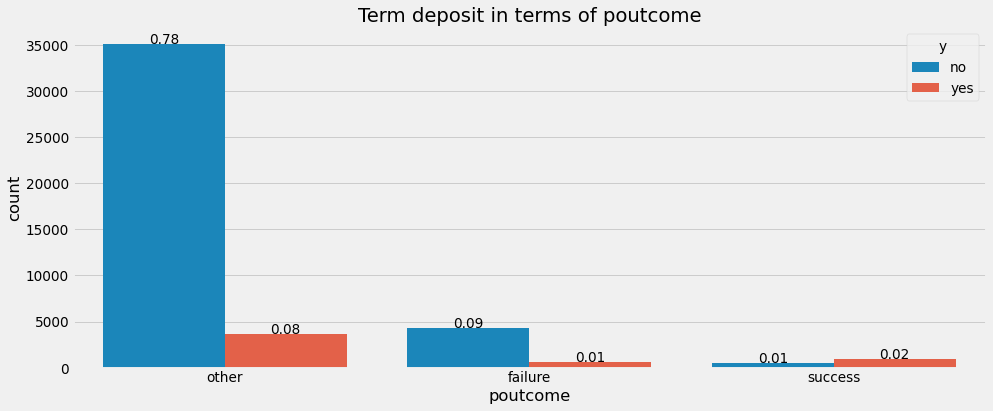

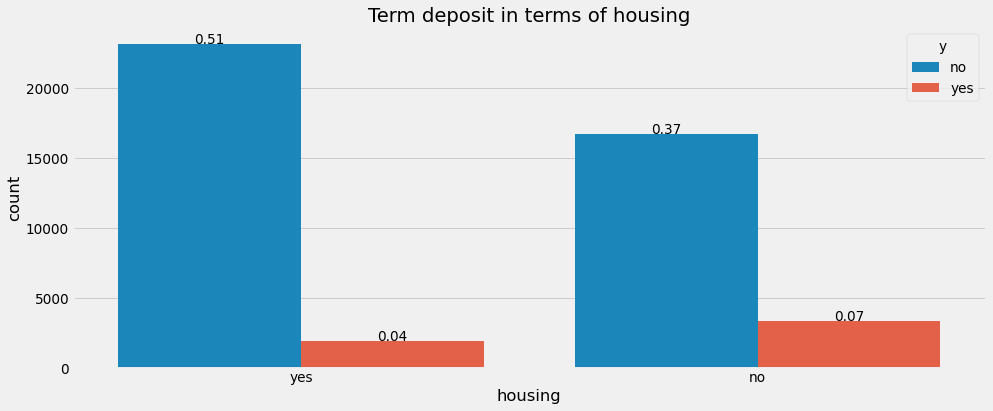

In [31]:
# Chart - 5 visualization code
def plot_cat_data(df, dep_var):
    cat_columns = list(set(df.describe().columns)^set(df.columns))
    cat_columns.remove(dep_var)
    for i, e in enumerate(cat_columns):
        plt.figure(i)
        ax = sns.countplot(x=e, hue=dep_var, data=df)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/df.shape[0]),
                    ha="center")
        if(len(ax.patches)>10):
            plt.xticks(rotation=90)  
        plt.title(f'Term deposit in terms of {e}')
        plt.show()

plot_cat_data(df, 'y')


##### 1. Why did you pick the specific chart?

**We have used bar charts to count the values of clients who have opted for term deposit and those who have not opted for it.**

##### 2. What is/are the insight(s) found from the chart?

**On the basis of the above bar charts we came up with these insights**:

* It is clear that only those who have previously not defaulted on their credit have chosen to use term deposits, in contrast to those who defaulted on their credit.

* People contacted in May have higher chances to subscribe for term deposits but have also higher chances for not subscribing the term deposits. Very few people are contacted in the month of December, March, September,October and have almost equal chances for subscribing the deposits or not

* We can observe that the majority of married and single clients chose term deposits, while just 0.01 of the customers who were divorced did.

* It cannot be clearly said that the y(term deposit) is dependent on the success or failure of the previous campaign as 0.08 agreed to the term deposit whose poutcome were unknown.

* Majority of the people who have not opted for any personal loan have made a term deposit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The insights gained from the chart can definitely help in creating a positive business impact. For example, understanding that clients who have previously not defaulted on their credit are more likely to opt for term deposits can help banks target such clients for future campaigns. Similarly, knowing that people contacted in May have higher chances of subscribing to term deposits can help banks plan their marketing strategies accordingly.**

#### Chart - 6

In [32]:
continuous_list

['age', 'balance', 'day', 'duration', 'campaign', 'previous']

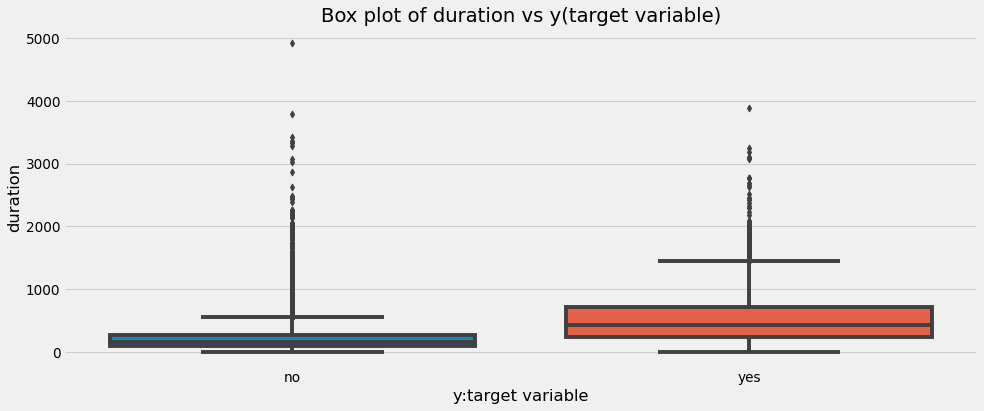

In [33]:
# Chart - 6 visualization code
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')
plt.show()

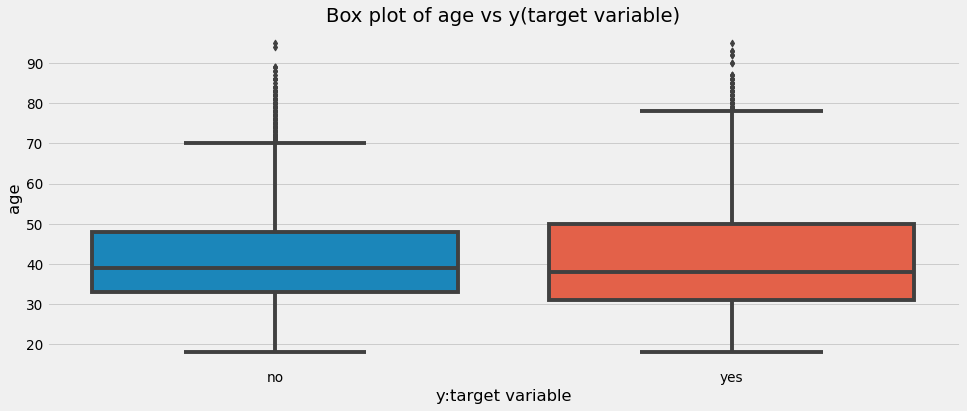

In [34]:
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')
plt.show()

Text(0.5, 0, 'y:target variable')

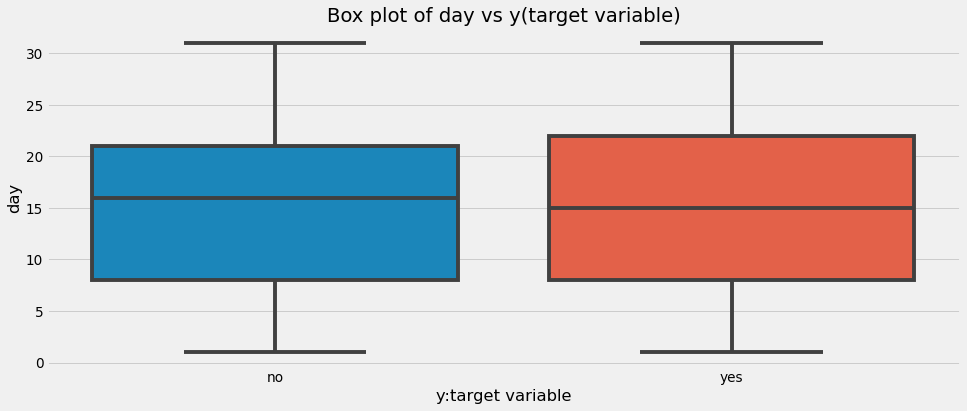

In [35]:
sns.boxplot(y=df['day'], x=df['y'])
plt.title('Box plot of day vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

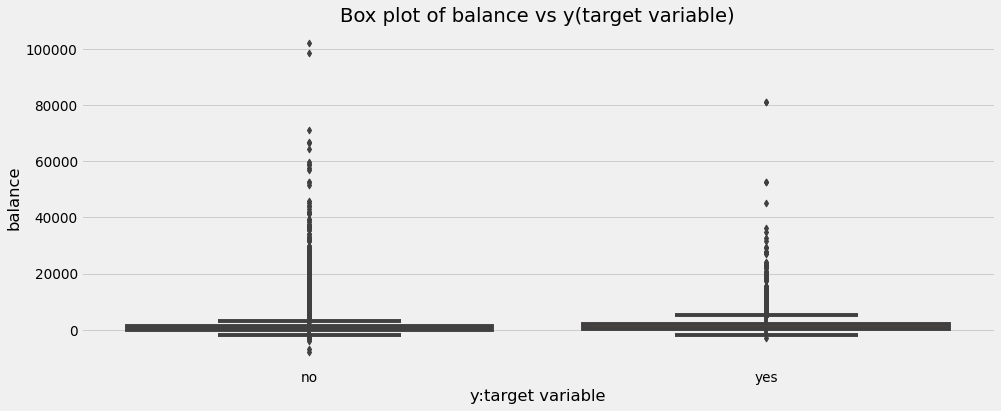

In [36]:
sns.boxplot(y=df['balance'], x=df['y'])
plt.title('Box plot of balance vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

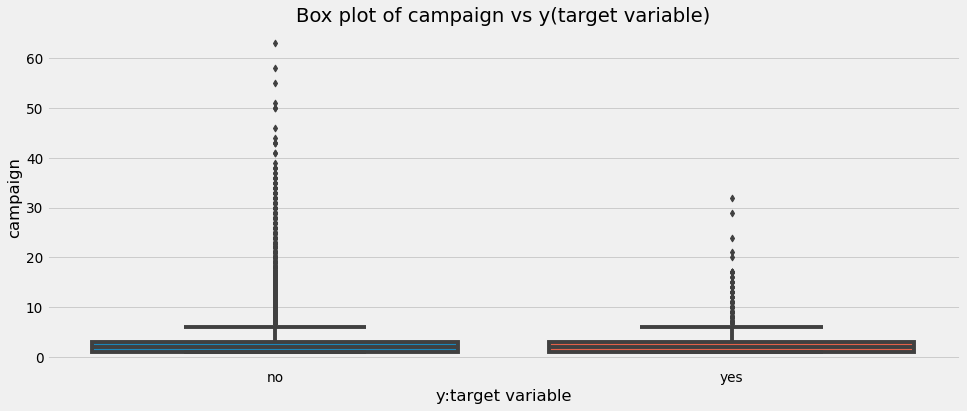

In [37]:
sns.boxplot(y=df['campaign'], x=df['y'])
plt.title('Box plot of campaign vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

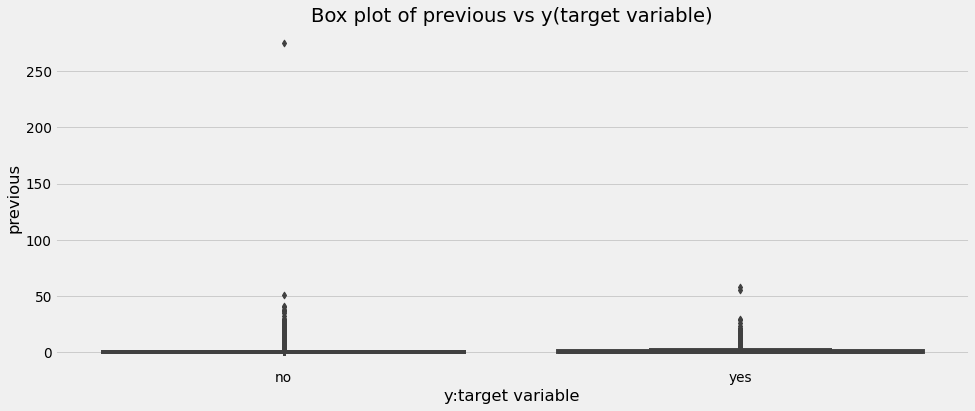

In [38]:
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')
     

##### 1. Why did you pick the specific chart?

To vizualize the spread of the continuous features across the target variable(yes or no), we used the box plots which clearly shows the median, quartiles and outliers accross the features

##### 2. What is/are the insight(s) found from the chart?

**Based on the bivariate analysis of continuous variable with target variable using box plot we came up with the following insights**:

* The clints who are spending more time on the phone call has the more chances of conversion.
* Those who have contacted earlier has more chances to opt for term deposit. Balance campaign and previous are full of outliers which need to be treated

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

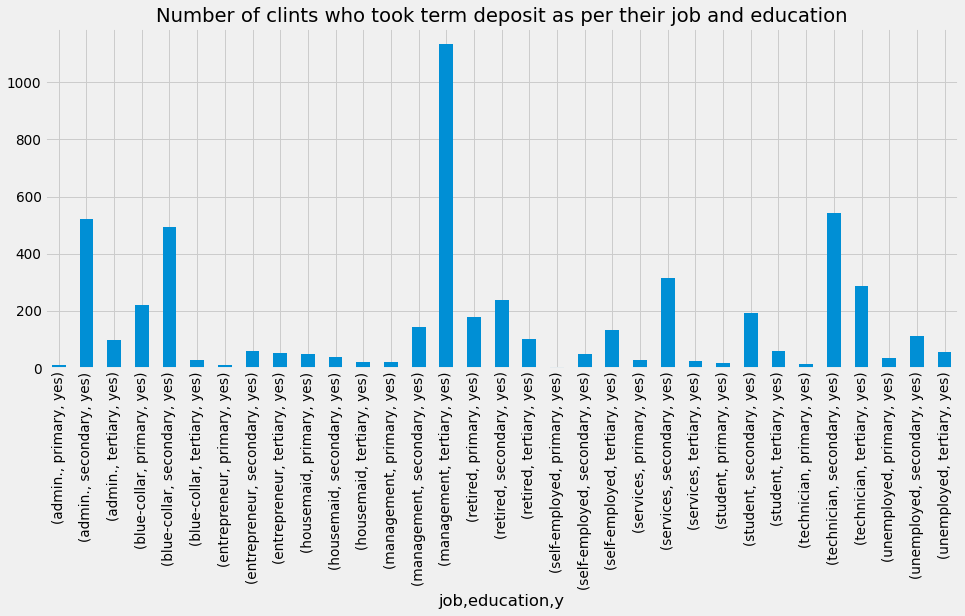

In [39]:
# Chart - 7 visualization code
df_yes = df[df.y=='yes']
df_yes.groupby(['job','education','y'])['y'].count().plot(kind="bar",title = 'Number of clints who took term deposit as per their job and education')
plt.show()

##### 1. Why did you pick the specific chart?

**Here, we used a Bar- Count Plot and visualised the number of clients who have made term deposits using a bar-count plot, grouping them based on their jobs and degree of education. We picked this particular graph since we were curious about the customer count**

##### 2. What is/are the insight(s) found from the chart?

**We can see that the most of clients who have management-related jobs and a tertiary degree have made the most term deposits.**
**Also**, **customers with the secondary level of education are the most with term deposits.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **Because they are less prevalent, strategies can be developed to engage clients who are unemployed and have only completed their primary education.**
* **Additionally**, **Company can devise strategies to engage socially disadvantaged clients**, **including housemaids and technicians, who seldom have any money left over for term deposits**.

#### Chart - 8

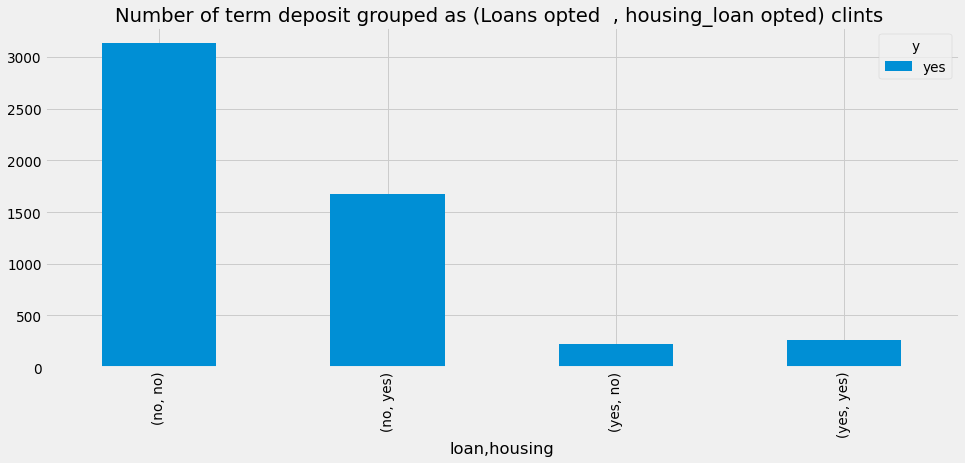

In [40]:
# Chart - 8 visualization code
df_yes.groupby(['loan','housing','y'])['y'].count().unstack().plot(kind='bar')
plt.title("Number of term deposit grouped as (Loans opted  , housing_loan opted) clints ")
plt.show()
     

##### 1. Why did you pick the specific chart?

**We are using bar plots to check the number of occasions on which customer went for the term deposit given that he as taken housing loan /any other kind of loan or not.**

##### 2. What is/are the insight(s) found from the chart?

**Based on the bar chart above we came up with following insights:**

If a customer is completely loan free he is more likely to go for term diposit.
The customers who already have both kind of loan are less likely to go for term diposit.
The customers who has only housing loan are second best options out of these conditions

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**From the above insights potentential customers can be identified and based on that various strategies can be formed to acquire these customers. Clearly customers who does not have any kind of loan is the best customers to target.**



#### Chart - 9

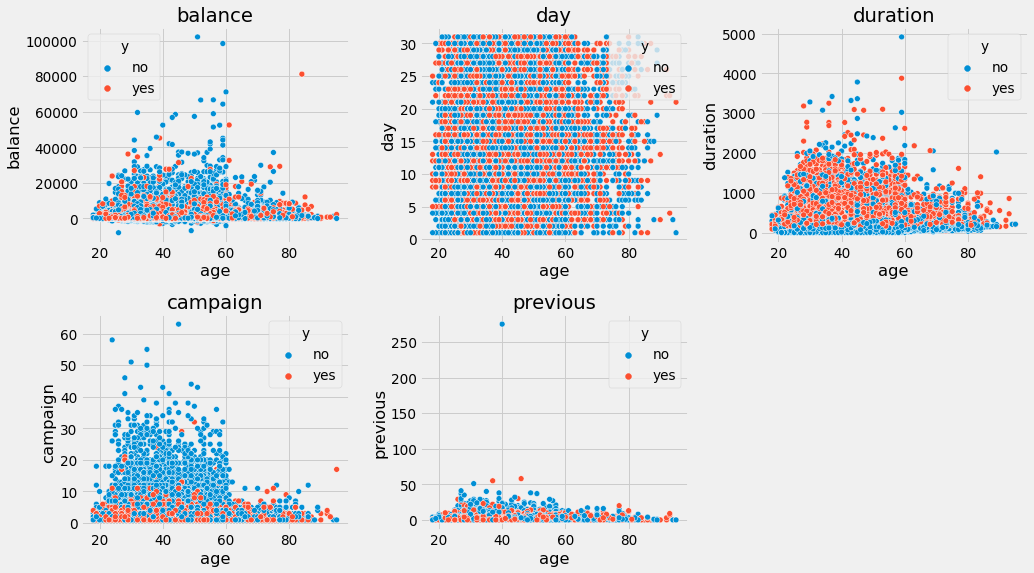

In [41]:
# Chart - 9 visualization code
abc = list(df[continuous_list].columns.values)
abc.remove('age')
n=1
fig = plt.figure(figsize=(15,12))
for i in abc:
    plt.subplot(3,3,n)
    n=n+1
    #fig = plt.figure(figsize=(8,8))
    sns.scatterplot(x=df.age, y=df[i], hue='y', data=df)
    plt.title(f'Age vs {i} with "yes" values')
    plt.title(i)
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

We used scatter plots to see the patterns of various continuous features with respect to age and we are identifying the conditions on which conversion of a customer depends.

##### 2. What is/are the insight(s) found from the chart?

* The customers who spent less than 200 seconds on the phone call are not interested for the term deposit.
* Those who are earning less than 10,000 are mostly going for term diposit.
* We can see a very unusuall pattern that when a customer who is contacted large number of times are not converting.

#### Chart - 10 - **CORRELATION HEATMAP**

<Axes: >

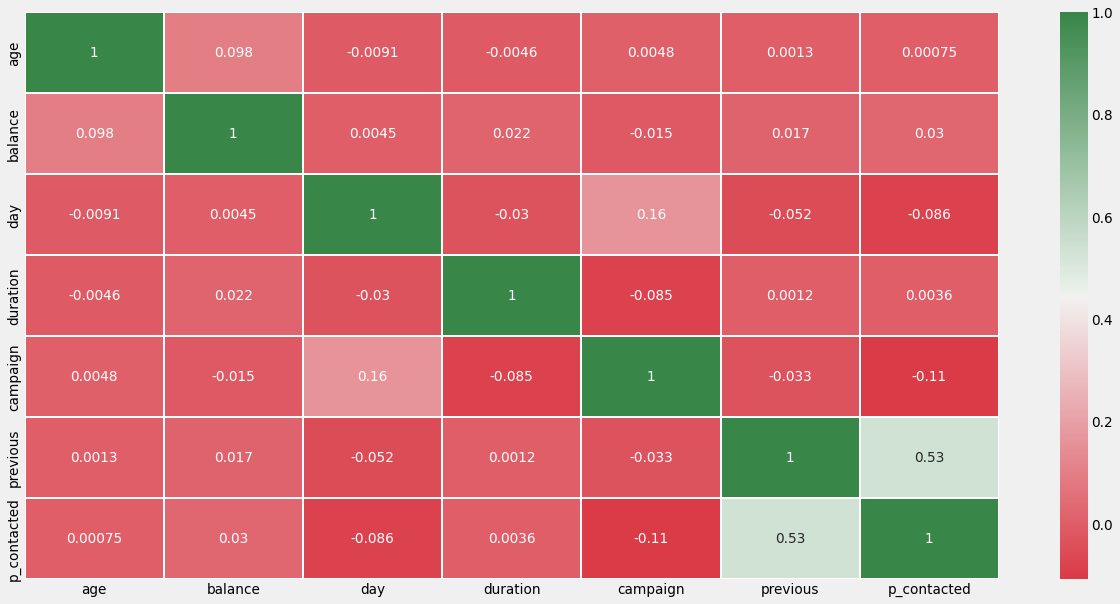

In [42]:
# Chart - 10 visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

##### 1. Why did you pick the specific chart?

This graph is used to check the correlation between all the variables. We have used it to gain insight about the presence of multicollinearity in our dataset

##### 2. What is/are the insight(s) found from the chart?


This graph is used to check the correlation between all the variables. We have used it to gain insight about the presence of multicollinearity in our dataset

#### Chart - 11 - **Pair Plot**

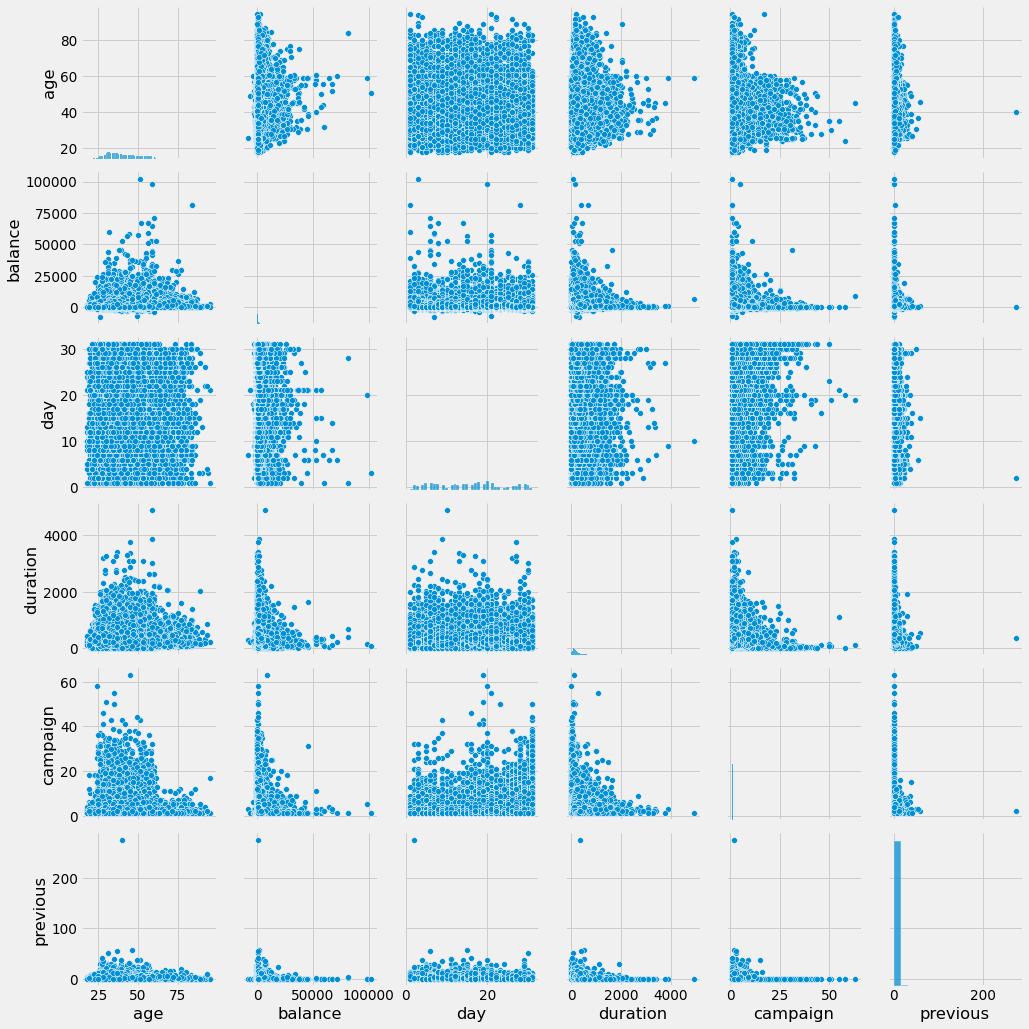

In [43]:
# Chart - 11 visualization code
# Pair Plot visualization code
sns.pairplot(df[continuous_list], palette="husl")


##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis

##### 2. What is/are the insight(s) found from the chart?

* Here we can see that the balance and duration has negative correlation that indicates that the customers who are rich are spending less time on a call.
* Similarly campaign and duration has also negatively correalted.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [44]:
#helper functions 
class statistic:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [45]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [46]:
#creating instance of the class
statistic = statistic()

In [47]:
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

In [48]:
zcdf = lambda x: norm(0,1).cdf(x)

In [49]:
def p_value(z,tailed):
  z=round(zcdf(z),10)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan
     

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Lets formualte our hypothesis where we considerd that mean account balance of the population is 1000**.

* Null Hypothesis H0 : ℳ > 1000 , Mean account balance is more than 1000
* Alternative Hypothesis H1 : ℳ <=1000 , Mean account balance is not more than 1000

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
relevant_df = df['balance'].copy()
hypothesis_mean = 1000
size = 150

relevant_df = relevant_df[-150:]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'l') #one tailed test
print(conclusion(p))


Failed to reject the Null Hypothesis for p = 0.9998005825.


Hence we can say that mean salary of the sample is more than 1000.

##### Which statistical test have you done to obtain P-Value?

We have calculated z-score for mean when standard deviation was known to obtain p-value, We have conducted one tailed test in this case.

##### Why did you choose the specific statistical test?

Since we are taking enough sample we can choose Z score test instead of t- test also in this case standard deviation was known to us.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average call duration is more than 2000 seconds.

* Null Hypothesis H0 : ℳ = 400 , Mean duration is 300
* Alternative Hypothesis H1 : ℳ !=400 , Mean duration is not 300

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
relevant_df = df['duration'].copy()
hypothesis_mean = 400
size = 150

relevant_df = relevant_df[150:300]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d') #both tailed test
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.924e-07


##### Which statistical test have you done to obtain P-Value?

We have calculated z-score for mean when standard deviation was known to obtain p-value, We have conducted two tailed test in this case.

##### Why did you choose the specific statistical test?

Since we are taking enough sample we can choose Z score test instead of t- test also in this case standard deviation was known to us.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) - Increasing age is an important factor for term deposit.
* Alternative Hypothesis(H1) - Age is not related to term deposit.

#### 2. Perform an appropriate statistical test.

In [52]:
# binary 
df[['default','housing','loan','y']]=df[['default','housing','loan','y']].replace(["yes","no"],[1,0])

In [53]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
  
# defining the table
data = [df['age'], df['y']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

p value is 1.0
Independent (failed to reject H0)


##### Which statistical test have you done to obtain P-Value?

A chi-square test is used in statistics to test the independence of two events

##### Why did you choose the specific statistical test?

A chi-square test is used in statistics to test the independence of two variables. Our aim was to know whether age is related to the response variable or not so we used this test here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

In our dataset there were some missing values which were filled by text 'Unknown' . There were 4 such variable all of them were categorical so first we mapped 'Unknown' with np.nan and then we did necessory imputaions for each columns. Details of these columns are given below:

1. Job: There were 288 nan values in this column. So we substituted the same with the mode of the column i.e. "Blue Collar jobs" as it was a categorical variable.
2. Education: There were 1857 nan values in this column, we substituted it with the mode i.e. "Secondary Education".
3. Contact: Since there are 13,020 nan values in this column and we are aware that cellular communication is currently the most preferred one, we made the assumption that the nan values might be replaced with cellular type values. And also the mode of the column is 'Cellular'.
4. poutcome: It contained 3 fields that is 'success', 'failure' and 'others'. Here we assumed that the unknown data points will fall under 'other' category, thus were filled with 'other'.

 PS : This step has already been performed in data wrangling section.

### 2. Handling Outliers

In [54]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
from scipy import stats
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

            age   balance  duration  campaign  previous
0      1.606965  0.256419  0.011016  0.569351  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.251940
...         ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.251940
45210  0.370689  0.528364  0.399328  0.246560  4.523577

[45211 rows x 5 columns]


(41794, 17)

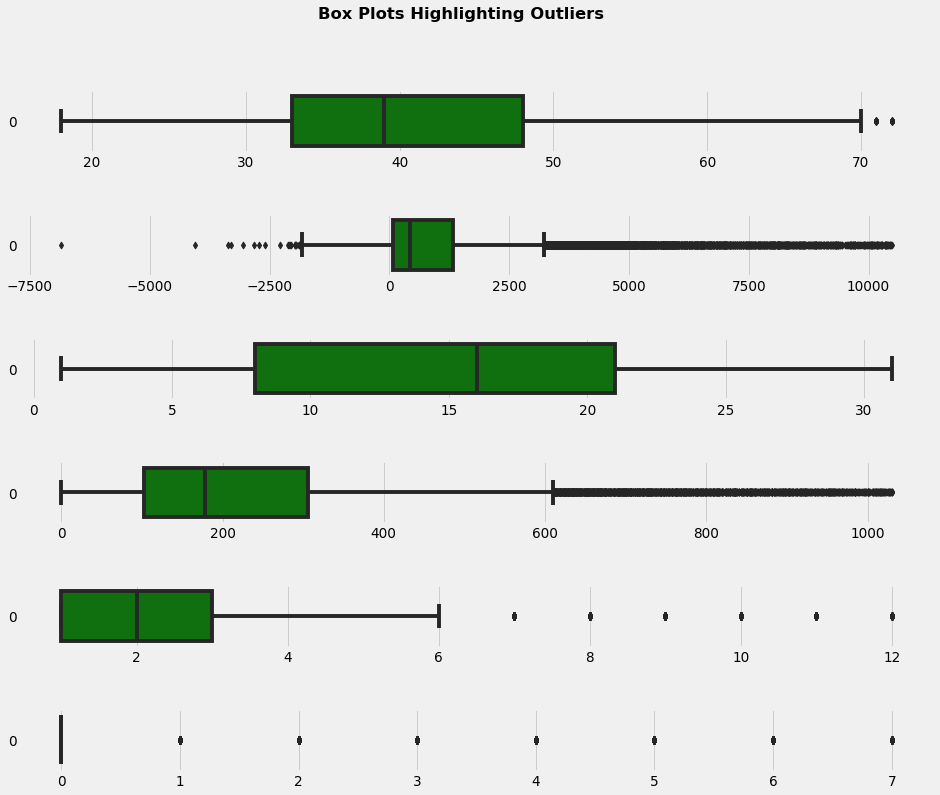

In [55]:
# plotting box plot to check for the outliers in each feature
nrows = len(continuous_list)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(continuous_list):
    sns.boxplot(df[var], orient='h', ax=axes[i],color= 'g')

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used Z score technique to detect and treat the outlier Z score is also called standard score. Z score = (x -mean) / std. deviation If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. So we have kept all the data points which are within 3 standard deviation and eliminated the others

### 3. Categorical Encoding

In [56]:
# Encode your categorical columns

# one hot encoding in features like 'marital', 'education', 'poutcome', 'contact.
df = pd.get_dummies(df,columns=['job', 'marital', 'education', 'poutcome', 'contact'])
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,contact_cellular,contact_telephone
0,58,0,2143,1,0,5,may,261,1,0,...,1,0,0,0,1,0,1,0,1,0
1,44,0,29,1,0,5,may,151,1,0,...,0,1,0,1,0,0,1,0,1,0
2,33,0,2,1,1,5,may,76,1,0,...,1,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,5,may,92,1,0,...,1,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,5,may,198,1,0,...,0,1,0,1,0,0,1,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Binary Encoding**

We have used One Hot encoding to convert the binary categorical variables into numeric form so that it can be used in fitting the model. We have replaced the Yes values with 1 and No values with 0.

**One Hot Coding**

One Hot Encoding means to encode or create additional features for all unique categorical values. So we used this method to create additional features known as dummy variables to fit all the data in the model.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [57]:
# dropping duration column from the dataset
df = df.drop(columns=['duration'], axis=1)

As stated in the notes for the dataset, the "duration" variable is not a good predictor of a potential "yes" because a 0 is an automatic "no" and time spent before a call cannot be known. We will therefore first drop this from our data set.

#### 2. Feature Selection

In [58]:
#contain all  independent variable
x=df.drop(['y','month'],axis=1)

#dependent variable
y=df['y']  
     

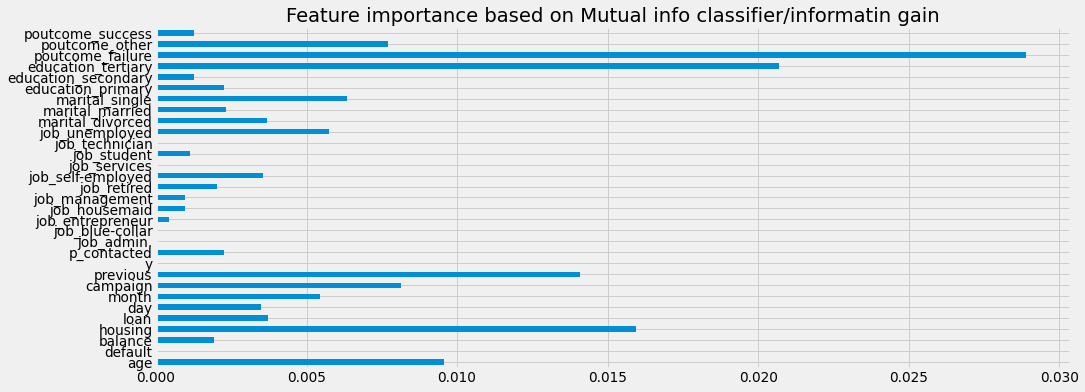

In [59]:

from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(x,y)
feat_importances = pd.Series(importance,df.columns[0:len(df.columns[0:31])])
feat_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/informatin gain")
plt.show()

##### What all feature selection methods have you used  and why?

**Information Gain**

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable

##### Which all features you found important and why?

As per technique used above we can say that all the features that we have included has significant importance . So we are keeping all of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Since we have treated the outliers above and in the next section we are going to scale the data using standard scaler where we will tansform the numerical features in the scale of 0 to 1. So we do not need data transformation now.

### 6. Data Scaling

In [60]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df1 = df.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'previous']
df1[num_cols] = scaler.fit_transform(df1[num_cols])

df1.head()

,age,default,balance,housing,loan,day,month,campaign,previous,y,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,contact_cellular,contact_telephone
0,1.730288,0,0.624190,1,0,-1.291029,may,-0.747707,-0.373779,0,...,1,0,0,0,1,0,1,0,1,0
1,0.339344,0,-0.609667,1,0,-1.291029,may,-0.747707,-0.373779,0,...,0,1,0,1,0,0,1,0,1,0
2,-0.753540,0,-0.625426,1,1,-1.291029,may,-0.747707,-0.373779,0,...,1,0,0,1,0,0,1,0,1,0
3,0.637404,0,0.252398,1,0,-1.291029,may,-0.747707,-0.373779,0,...,1,0,0,1,0,0,1,0,1,0
4,-0.753540,0,-0.626009,0,0,-1.291029,may,-0.747707,-0.373779,0,...,0,1,0,1,0,0,1,0,1,0


##### Which method have you used to scale you data and why?

 We scaled our numerical data using `StandardScaler()` function from sklearn we can scale each our columns that contains numerical data. The scaling is done using the formula below:

<div align="center">$Z = \frac{X - U}{S}$</div>

*Where:*

*$Z:$ scaled value*

*$X:$ original value*

*$U:$ mean of the data*

*$S:$ standard deviation of the data*                                         

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, here we do not need Dimensionality Reduction as we have seen above that all the features are significant enough and there are only 31 columns in our dataset.

### 8. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Select Features
feature = df1.drop(['y','month'], axis=1)

# Select Target
target = df1['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (33435, 31)
Shape of testing feature: (8359, 31)
Shape of training label: (33435,)
Shape of training label: (8359,)


##### What data splitting ratio have you used and why? 

For the train-test split, we utilised an 80:20 ratio. We can see we have 33435 data for training and 8359 testing which is a fair split to start with.

### 9. Handling Imbalanced Dataset

In [62]:

# Previous original class distribution
print('Original class distribution: \n')
print(target.value_counts())

Original class distribution: 

0    37501
1     4293
Name: y, dtype: int64


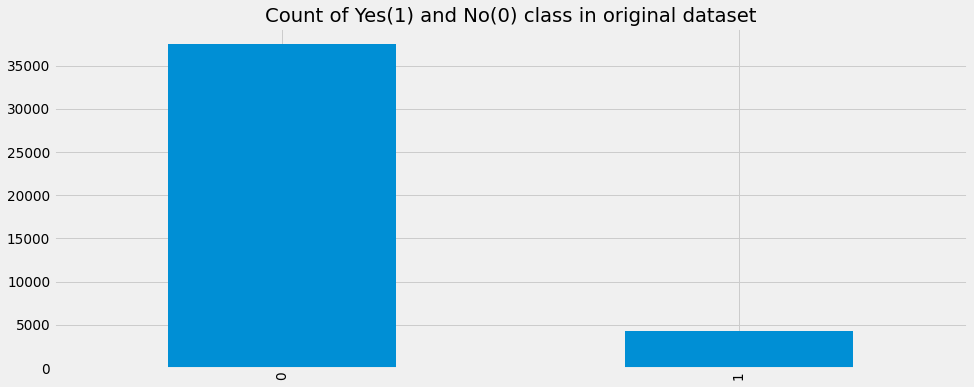

In [63]:

# plotting bar plot to visualize th class imbalance
df1.y.value_counts().plot(kind="bar")
plt.title("Count of Yes(1) and No(0) class in original dataset")
plt.show()


##### **Do you think the dataset is imbalanced? Explain Why.**


We can clearly detect a class imbalance, as the count of 0 labels is 37501 and the count of 1 labels is 4293. In our scenario, a class imbalance is to be expected because the dataset we are working on is a prediction of a bank's marketing effectiveness. It is evident that the number of people opting for a term deposit will be lower than the number of individuals who do not opt for it out of the total number of customers contacted.

**SMOTE technuque**

In [64]:
# importing libraries for smote
from imblearn.over_sampling import SMOTE
from collections import Counter
# applying smote technique
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_res).value_counts()) 

Synthetic sample class distribution: 

0    30028
1    30028
Name: y, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**SMOTE**- **(Synthetic Minority Oversampling Technique)**

This technique generates synthetic data for the minority class. Here we can see that our minority class is label 1. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

## ***7. ML Model Implementation***

After making sure our data is good and ready we can continue to building our model. In this notebook we will try to build 4 different models with different algorithm. In this step we will create a baseline model for each algorithm using the default paramaeters set by sklearn and after building all 4 of our models we will compare them to see which works best for our case.

To evaluate our model we will use the confusion matrix as our base for the evaluation.

<div align='center'><img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' height='250'></div>
where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

We will use 6 metrics below to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes

In [65]:
# defining a function for model and defining the formulae for all the evaluation metrics used
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### **ML Model - 1: Decision Tree**

In [66]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_res, y_res)
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)
# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8126570163895203
Precision: 0.23143759873617695
Recall: 0.3306997742663657
F1 Score: 0.27230483271375466
Cohens Kappa Score: 0.16862404428113276
Area Under Curve: 0.6002488567571626
Confusion Matrix:
 [[6500  973]
 [ 593  293]]


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**


**Decision Tree** 


A decision tree is a type of machine learning algorithm that uses a tree like modelto make predictions based on the relationship between the features in a dataset. It works by dividing the data into smaller and smaller groups based on the values of the features, until it reaches a decision about the target variable for each group

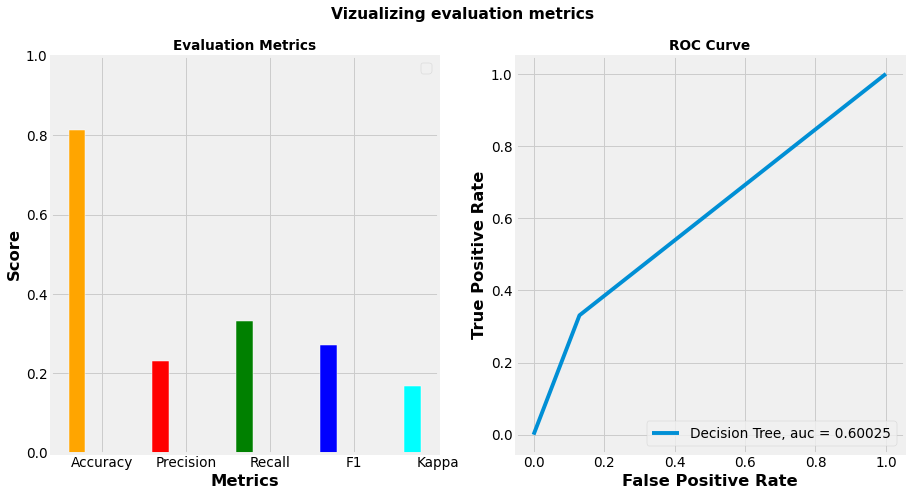

In [67]:
# Visualizing evaluation Metric Score chart

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualizing evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

# First plot
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

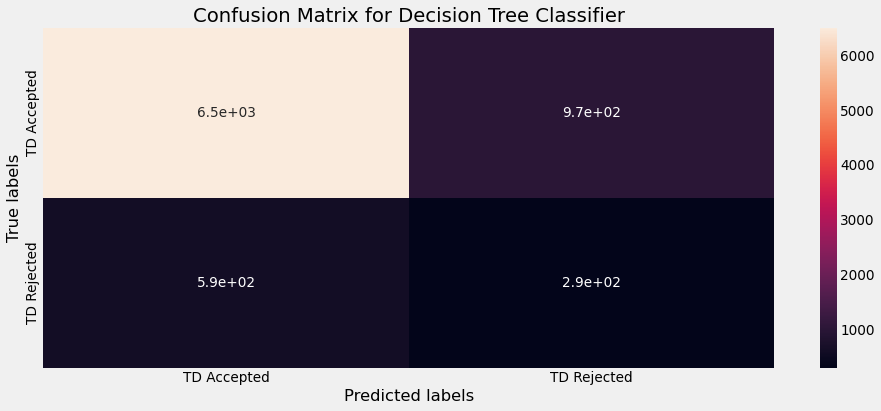

In [68]:
# Get the confusion matrix for both train and test
labels = ['TD Accepted','TD Rejected']
ax= plt.subplot()
sns.heatmap(dtc_eval['cm'], annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

Based on our observations, model accuracy is good (81%), but recall, precision, and other metrics are poor. We might conclude that this model is not a good fit for our dataset and that we should experiment with different models.

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [25,26,27,28,29,30,31,32,35,37,40,50, 80, 100]}

# Create a base model
dtc_grid = tree.DecisionTreeClassifier(random_state=0)


# Initiate the grid search model
grid_search = GridSearchCV(estimator=dtc_grid, param_grid=param_grid, scoring='roc_auc',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_res, y_res)

grid_search.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'max_depth': 26}

In [70]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0,max_depth=26)
dtc.fit(X_res, y_res)
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)
# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.803923914343821
Precision: 0.232409381663113
Recall: 0.3690744920993228
F1 Score: 0.28521587440034885
Cohens Kappa Score: 0.17833663378450126
Area Under Curve: 0.6158839995541511
Confusion Matrix:
 [[6393 1080]
 [ 559  327]]


##### Which hyperparameter optimization technique have you used and why?

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best max depth value to optimize our model. We have also used Cross validation with CV = 5

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Accuracy Before: 81.26% || Accuracy After: 80.12%

Precision Before: 23.14% || Precision After: 22.69%

Recall Before: 33.06% || Recall After: 36.34%

F1 Score Before: 27.23%|| F1 Score After: 27.93%

Cohens Kappa Score Before: 16.86%|| Cohens Kappa Score After: 17.12%

Area Under Curve Before: 60.02% || Area Under Curve After: 61.12%

We can see that after tuning the hyperparameter max depth there is an increment of 3% in recall value , area under curve also increased by one percent.

**Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

In this model we have high accuracy value but recall and precision value is not compeminting with the accuracy . In our case we need as many as true positives as possible because anyone who is interested in term deposit should not be left out. So that makes recall is the most important metrics for business point of view. So decision tree algorithem may not fulfill our need in that respect.

### **ML Model - 2: Random Forest**

In [71]:
# importing library for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_res, y_res)

RandomForestClassifier(random_state=0)

In [72]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8758224668022491
Precision: 0.3972972972972973
Recall: 0.33182844243792325
F1 Score: 0.3616236162361624
Cohens Kappa Score: 0.29345918318654995
Area Under Curve: 0.7378107462259166
Confusion Matrix:
 [[7027  446]
 [ 592  294]]


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**


**Random Forest**


A Random Forest is a type of ensemble learning algoritm that trains multiple decision trees on subsets of the data and then combines their predictions to make a final prediction. This can improve the performance of the model compared to using a single decision tree.

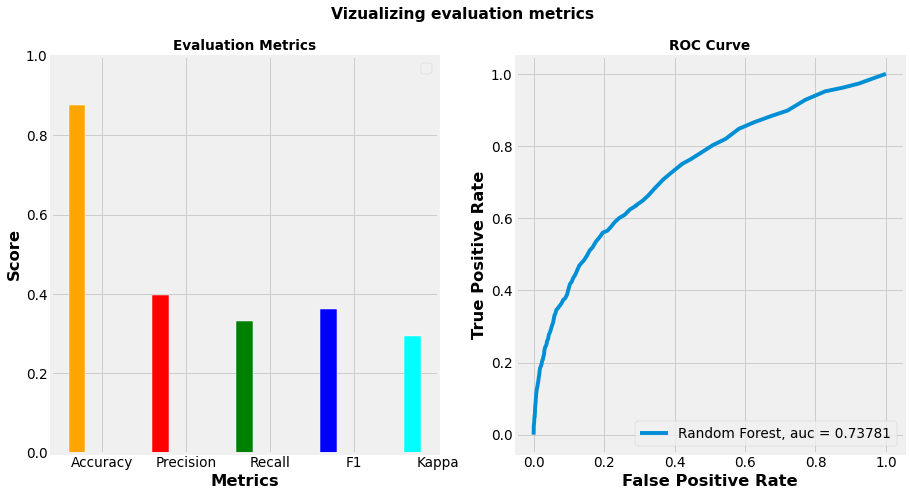

In [73]:
# Visualizing evaluation Metric Score chart

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualizing evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

# First plot
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distribution based on your requirements
param_dist = {
    'max_depth': randint(50, 100),
    'max_features': randint(2, 5),
    'min_samples_leaf': randint(3, 6),
    'min_samples_split': randint(8, 13),
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf = RandomForestClassifier(random_state=0)

# Initiate the randomized search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='recall',
                                   cv=5, n_iter=10, random_state=0, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_


In [75]:
print(best_params)
print(best_score)

{'max_depth': 82, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 500}
0.16759939884851066


In [76]:
# Building Random Forest model with tuned parameter
rf_tuned = RandomForestClassifier(random_state=0, max_depth = 50, max_features=4, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 300)
rf_tuned.fit(X_res, y_res)

RandomForestClassifier(max_depth=50, max_features=4, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=300, random_state=0)

In [77]:
# Evaluate Model
rf_eval = evaluate_model(rf_tuned, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.851178370618495
Precision: 0.3467465753424658
Recall: 0.45711060948081267
F1 Score: 0.39435248296007785
Cohens Kappa Score: 0.3113371201660431
Area Under Curve: 0.749042074417489
Confusion Matrix:
 [[6710  763]
 [ 481  405]]


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in this case is RandomizedSearchCV. It was chosen because it allows for efficient exploration of a wide range of hyperparameter combinations by randomly sampling from the specified parameter distributions. Compared to GridSearchCV, RandomizedSearchCV reduces computational cost while still providing an opportunity to find optimal hyperparameter values for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Accuracy Before: 87.58% || Accuracy After: 85.11%

Precision Before: 39.79% || Precision After: 34.68%

Recall Before: 33.18% || Recall After: 45.37%

F1 Score Before: 36.16%|| F1 Score After: 39.31%

Cohens Kappa Score Before: 29.34%|| Cohens Kappa Score After: 31.02%

Area Under Curve Before: 73.73% || Area Under Curve After: 75.15%

The adjustment of the hyperparameters has clearly boosted the Precision and Cohens Kappa Score Value. As a result, it has not resulted in a significant improvement in our model

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Random forest has better performance in terms of accuracy but it does not performs well as far as precision and recall is considerd , we can say that it is not a very decent upgrade over decision tree in our case since we are interested in better recall value. 

### **ML Model - 3 - LOGISTIC REGRESSION**


Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc    

In [80]:
# ML Model - 3 Implementation
from sklearn.linear_model import LogisticRegression

# Fit the Algorithm
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_res, y_res)

# Predict on the model
# Evaluate Model
clf_eval = evaluate_model(clf, X_res, y_res)
# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.7770247768749168
Precision: 0.8023479809544579
Recall: 0.7351471959504462
F1 Score: 0.7672789836812013
Cohens Kappa Score: 0.5540495537498336
Area Under Curve: 0.8584791544143631
Confusion Matrix:
 [[24590  5438]
 [ 7953 22075]]


In [81]:
clf.coef_

array([[-0.15596613, -1.29366144,  0.01488613, -1.18057078, -1.45708744,
        -0.06689248, -0.46227577,  0.07927455, -0.30613563, -4.82324116,
        -4.77402382, -5.82432923, -6.11698915, -4.76047896, -4.1486128 ,
        -5.62076365, -5.13480484, -4.4050071 , -4.95281922, -5.22831404,
        -5.36129714, -5.19431877, -5.04157622, -5.22325807, -4.65424464,
        -4.49832387, -4.91032842, -4.96995644, -2.61188361, -4.37299443,
        -5.50837034]])

In [82]:
clf.intercept_

array([24.16460376])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

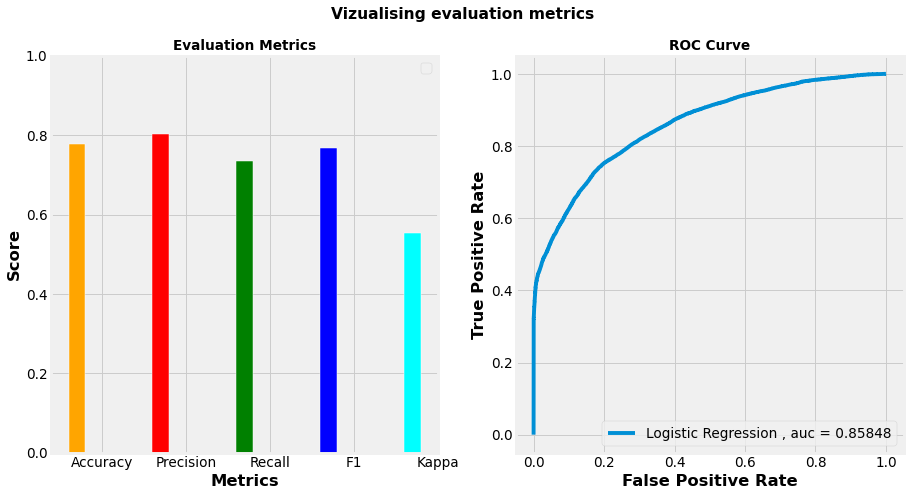

In [83]:
# Visualizing evaluation Metric Score chart
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualising evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Logistic Regression , auc = {:0.5f}'.format(clf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

[Text(0, 0.5, 'TD Accepted'), Text(0, 1.5, 'TD Rejected')]

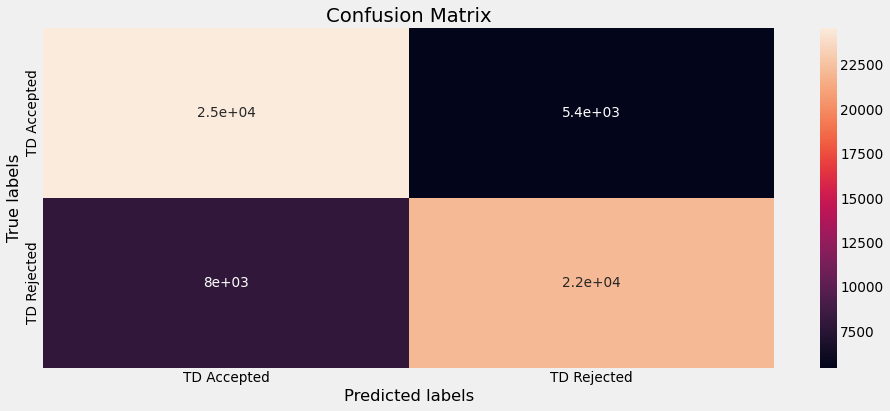

In [84]:
# Get the confusion matrix for decision tree classifier for both actual and predicted values
labels = ['TD Accepted','TD Rejected']
ax= plt.subplot()
sns.heatmap(clf_eval['cm'], annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Logistic Regression may be a suitable fit in our scenario because recall and precision are 73% and 80%, respectively. The accuracy is just 77% in this case, but we want maximum recall to forecast as many true positives as possible so that we don't miss out on any customers who actually want to make a deposit.

#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_res , y_res)
# LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.676 total time=   0.3s
[CV 2/5] END C=0.001, penalty=l1, solve

In [88]:
# Fit the Algorithm
clf = LogisticRegression(fit_intercept=True, max_iter=10000 , C = 0.1, penalty = 'l1', solver = 'saga')
clf.fit(X_res, y_res)

# Predict on the model
# Evaluate Model
clf_eval = evaluate_model(clf, X_res, y_res)
# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.7771579858798455
Precision: 0.8017913478623491
Recall: 0.7363460769948048
F1 Score: 0.767676416977693
Cohens Kappa Score: 0.5543159717596909
Area Under Curve: 0.85821706942354
Confusion Matrix:
 [[24562  5466]
 [ 7917 22111]]


##### Which hyperparameter optimization technique have you used and why?

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best combination of values of C, Penalty and Solver to optimize our model. We got best params Config: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} with a mean accuracy of 77%. We have also used Cross validation with CV = 5

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of Logistic Regression we observed very slight improvement in the evaluation metrics.

Accuracy Before: 77.70% || Accuracy After: 77.77%

Precision Before: 80.23% || Precision After:80.17 %

Recall Before: 73.51% || Recall After: 73.63%

F1 Score Before: 76.72%|| F1 Score After: 76.76%

Cohens Kappa Score Before: 55.40%|| Cohens Kappa Score After: 55.43%

Area Under Curve Before: 85.84% || Area Under Curve After:85.82 %

**Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

Out of all the models we've used so far, logistic regression has the highest recall value (73%), which is quite a good score for the dataset used because we can't afford to miss out on interested clients, so this metric provides us with genuine results that meet our needs. The greater the true positives relative to total actual positives, the better the model in this scenario.

### ML Model - 4 :  KNN classifiers

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_res, y_res)

KNeighborsClassifier()

In [90]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7389639909080034
Precision: 0.20652173913043478
Recall: 0.5146726862302483
F1 Score: 0.29476405946994183
Cohens Kappa Score: 0.1690570961409411
Area Under Curve: 0.6703967994335667
Confusion Matrix:
 [[5721 1752]
 [ 430  456]]


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**KNN classifiers**

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

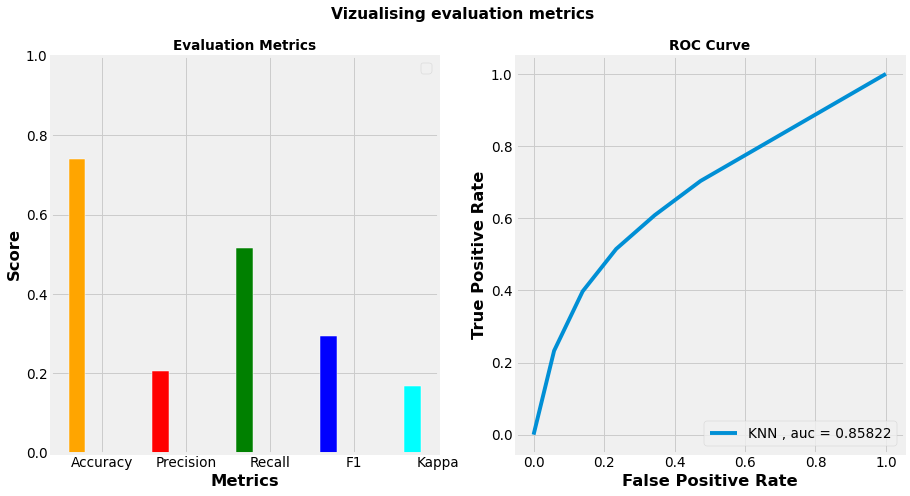

In [91]:
# Visualizing evaluation Metric Score chart
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualising evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
ax1.bar(r1, knn_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='KNN , auc = {:0.5f}'.format(clf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

KNN classifier fits well with our dataset with accuracy of almost 77% and better recall value of 51%.

### **ML Model - 5: Naive Bayes**

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)}$</div>

In [92]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_res, y_res)

GaussianNB()

In [93]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.619332456035411
Precision: 0.16452367036820573
Recall: 0.6354401805869074
F1 Score: 0.26137418755803155
Cohens Kappa Score: 0.11181332702525548
Area Under Curve: 0.6753962874323486
Confusion Matrix:
 [[4614 2859]
 [ 323  563]]


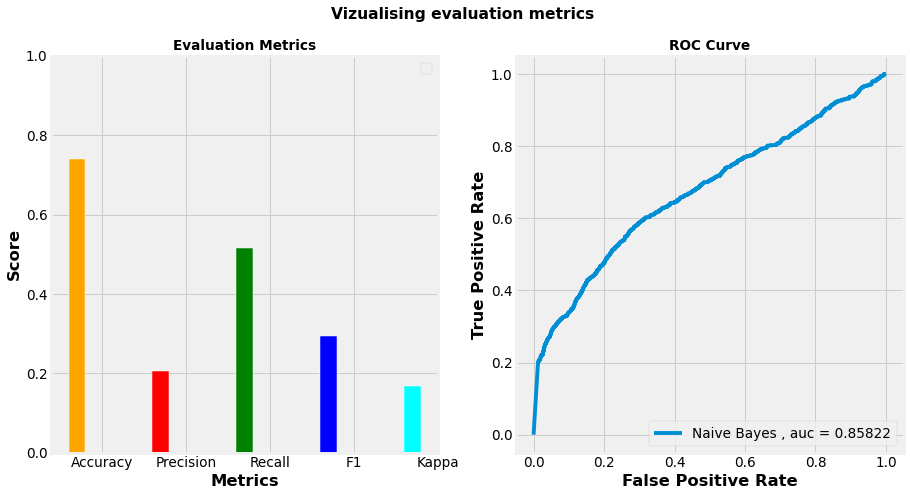

In [94]:
# Visualizing evaluation Metric Score chart
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualising evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
ax1.bar(r1, knn_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes , auc = {:0.5f}'.format(clf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

Naive bayes model has second best recall value after logistic regression but this model is less accurate as compared to other.

# **Model Comparision**

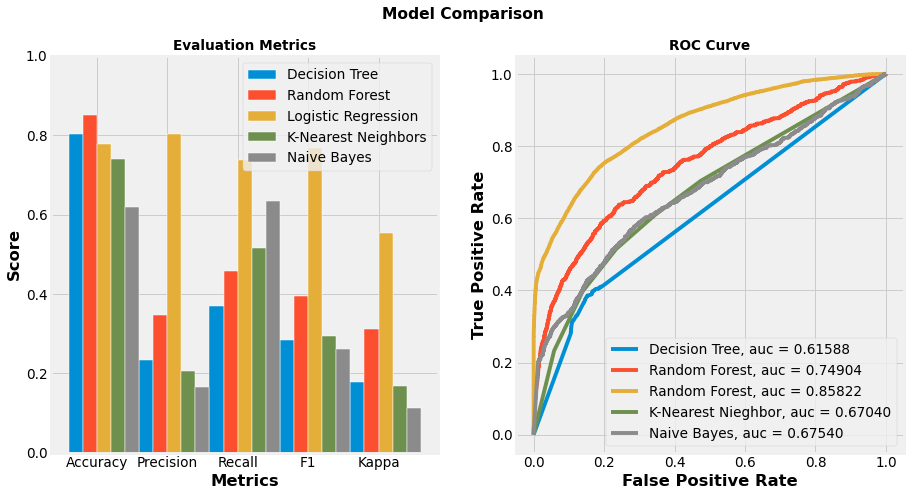

In [95]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, clf_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))


## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 We want to focus on our model's recall value because we want to predict as many actual positives as possible in our problem. Because misclassifying a customer who wanted to make a deposit can result in a lost opportunity/revenue.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We can see that logistic regression has the highest performance of the three that we have used till now. It not only performs well in terms of accuracy but also in terms of precision and recall. It has the highest true positives and recall value which indicates that very less number of clints who have shown interest in the term deposit has been predicted inaccurately in our model. Good precision value indicates that our model is bang on in predicting the true positives out of total predicted positives. Since both precision and recall value has better result the f1 score which is the combition of two has also a better number. Better outcomes of true positives will lead to better area under the curve which is evident from the AUC-ROC plot.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We have used Logistic Regression as the best model and Coefficient values as the model explainibility tool for the feature importance

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [96]:
# Save the File
# Save the File
import pickle
pickle.dump(clf, open('model_save','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [97]:
# Load the File and predict unseen d
model = pickle.load(open('/content/model_save','rb'))

In [98]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
prediction_df = pd.DataFrame(np.array(y_test), columns = ["y_test"])
prediction_df["y_test_predicted"] = np.array(model.predict(X_test))
prediction_df[:50]

,y_test,y_test_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,0,0
9,0,1


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Based on our analysis and model training we can say that logistic regression performs better than other tree based models as well as generative models such as naive bayes in terms of precision and recall, which is of the prime importance from business point of view specially in our case. Our findings of the evaluation metrics for all the models that we have used are given below:

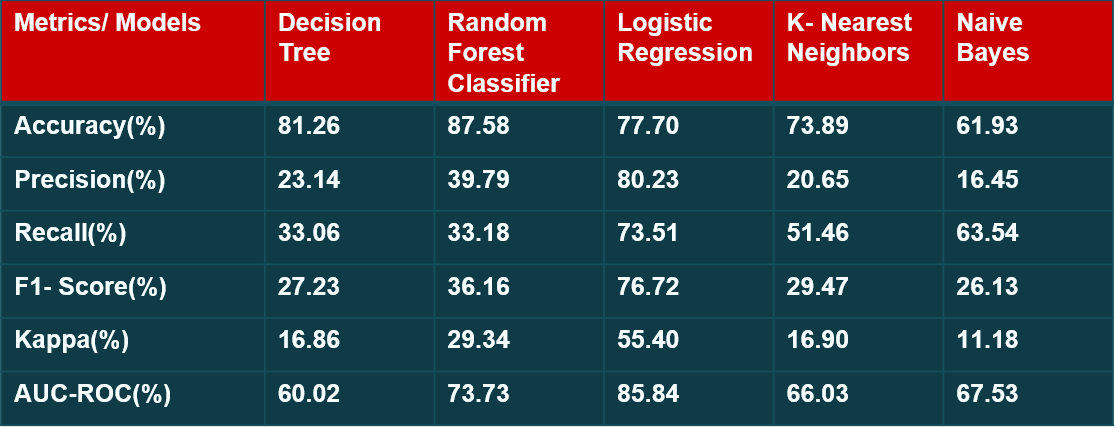

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***